In [1]:
import pandas as pd
import numpy as np

df = pd.read_excel('网约车城市运营情况.xlsx')
df.head()

星期  时段  城市    冒泡数    呼叫数    应答数    完单数   司机在线
0  周一   0  A市  29618  12616  11388  11276  13700
1  周一   1  A市  17822   7851   7025   6890   9217
2  周一   2  A市  12524   5616   4864   4747   6641
3  周一   3  A市   7232   3166   2724   2199   4939
4  周一   4  A市   6213   2447   1999   1794   4071

# 各城市完单情况分析

In [2]:
city_finish_num = df.groupby(['城市'])['完单数'].sum().reset_index()

# 按照完单数从高到低排列
city_finish_num.sort_values(by='完单数', ascending=False, inplace=True)
# 计算整体平均值
city_finish_num['平均值'] = round(np.mean(city_finish_num['完单数']))
# 将各城市的完单数除以平均值
city_finish_num['完单数VS平均值%'] = round((city_finish_num['完单数']/city_finish_num['平均值'])*100)

city_finish_num

城市      完单数      平均值  完单数VS平均值%
2  C市  3957520  3665949      108.0
3  D市  3655778  3665949      100.0
0  A市  3619113  3665949       99.0
1  B市  3610821  3665949       98.0
4  E市  3486512  3665949       95.0

In [3]:
city_finish_num.to_clipboard()

# 各城市过程指标分析

In [4]:
# 计算每个城市的
city_bubble_num = df.groupby('城市')['冒泡数'].sum().reset_index()
city_call_num = df.groupby('城市')['呼叫数'].sum().reset_index()
city_answer_num = df.groupby('城市')['应答数'].sum().reset_index()
city_driver_num = df.groupby('城市')['司机在线'].sum().reset_index()

# 拼接表格
lists = [city_bubble_num, city_call_num, city_answer_num, city_driver_num]
result = city_finish_num.drop(columns=['平均值'])

for table in lists:
    result = result.merge(table, on='城市')

result['每人次订单量'] = round(result['完单数']/result['司机在线'],2)
result

城市      完单数  完单数VS平均值%       冒泡数      呼叫数      应答数     司机在线  每人次订单量
0  C市  3957520      108.0   7244300  4850460  4621680  2457820    1.61
1  D市  3655778      100.0  10436933  4393449  4027468  3726086    0.98
2  A市  3619113       99.0  11341762  4708803  4126801  4227979    0.86
3  B市  3610821       98.0   8493957  4358118  4222191  3940414    0.92
4  E市  3486512       95.0  10990002  4384481  4029768  3836432    0.91

In [5]:
# 冒泡数 VS 平均值
result['冒泡数均值'] = round(np.mean(result['冒泡数']))
result['冒泡数VS平均值%'] = round((result['冒泡数']/result['冒泡数均值'])*100)

# 呼叫数 VS 平均值
result['呼叫数均值'] = round(np.mean(result['呼叫数']))
result['呼叫数VS平均值%'] = round((result['呼叫数']/result['呼叫数均值'])*100)

# 司机在线数 VS 平均值
result['司机在线均值'] = round(np.mean(result['司机在线']))
result['司机在线VS平均值%'] = round((result['司机在线']/result['司机在线均值'])*100)

# 每人次订单数 VS 平均值
result['每人次订单量均值'] = round(np.mean(result['每人次订单量']))
result['每人次订单量VS平均值%'] = round((result['每人次订单量']/result['每人次订单量均值'])*100)

In [6]:
result

城市      完单数  完单数VS平均值%       冒泡数      呼叫数      应答数     司机在线  每人次订单量  \
0  C市  3957520      108.0   7244300  4850460  4621680  2457820    1.61   
1  D市  3655778      100.0  10436933  4393449  4027468  3726086    0.98   
2  A市  3619113       99.0  11341762  4708803  4126801  4227979    0.86   
3  B市  3610821       98.0   8493957  4358118  4222191  3940414    0.92   
4  E市  3486512       95.0  10990002  4384481  4029768  3836432    0.91   

     冒泡数均值  冒泡数VS平均值%    呼叫数均值  呼叫数VS平均值%   司机在线均值  司机在线VS平均值%  每人次订单量均值  \
0  9701391       75.0  4539062      107.0  3637746        68.0         1   
1  9701391      108.0  4539062       97.0  3637746       102.0         1   
2  9701391      117.0  4539062      104.0  3637746       116.0         1   
3  9701391       88.0  4539062       96.0  3637746       108.0         1   
4  9701391      113.0  4539062       97.0  3637746       105.0         1   

   每人次订单量VS平均值%  
0         161.0  
1          98.0  
2          86.0  
3          92.0  
4          91.0

In [7]:
result.columns

Index(['城市', '完单数', '完单数VS平均值%', '冒泡数', '呼叫数', '应答数', '司机在线', '每人次订单量',
       '冒泡数均值', '冒泡数VS平均值%', '呼叫数均值', '呼叫数VS平均值%', '司机在线均值', '司机在线VS平均值%',
       '每人次订单量均值', '每人次订单量VS平均值%'],
      dtype='object')

In [8]:
result[['城市', '完单数VS平均值%', '冒泡数VS平均值%', '呼叫数VS平均值%', '司机在线VS平均值%', '每人次订单量VS平均值%']]

城市  完单数VS平均值%  冒泡数VS平均值%  呼叫数VS平均值%  司机在线VS平均值%  每人次订单量VS平均值%
0  C市      108.0       75.0      107.0        68.0         161.0
1  D市      100.0      108.0       97.0       102.0          98.0
2  A市       99.0      117.0      104.0       116.0          86.0
3  B市       98.0       88.0       96.0       108.0          92.0
4  E市       95.0      113.0       97.0       105.0          91.0

# 漏斗分析

In [9]:
result['最终转化率%'] = round(result['完单数']/result['冒泡数'], 2)
result['呼叫率%'] = round(result['呼叫数']/result['冒泡数'], 2)
result['应答率%'] = round(result['应答数']/result['呼叫数'], 2)
result['完单率%'] = round(result['完单数']/result['应答数'], 2)

result = result.sort_values(by='最终转化率%', ascending=False)
result[['城市', '呼叫率%', '应答率%', '完单率%', '最终转化率%']]

城市  呼叫率%  应答率%  完单率%  最终转化率%
0  C市  0.67  0.95  0.86    0.55
3  B市  0.51  0.97  0.86    0.43
1  D市  0.42  0.92  0.91    0.35
2  A市  0.42  0.88  0.88    0.32
4  E市  0.40  0.92  0.87    0.32

## 单独把 AC 两个城市拎出来对比
并加入“星期”

In [10]:
# 筛选城市 A 和 C
ca_city = df[df['城市'].isin(['A市', 'C市'])]
# 分组顺序，先按星期，再按城市
ca_data = ca_city.groupby(['星期', '城市'])[['冒泡数', '呼叫数', '应答数', '完单数']].agg('sum')
ca_data = ca_data.reset_index()

# 指定星期列为 Categorical 类型，并按照指定顺序排序
week_order = ['周一', '周二', '周三', '周四', '周五', '周六', '周日']
ca_data['星期'] = pd.Categorical(ca_data['星期'], categories=week_order, ordered=True)
ca_data = ca_data.sort_values('星期')

In [11]:
ca_data.head()

星期  城市      冒泡数     呼叫数     应答数     完单数
0  周一  A市  1434468  618654  540087  478519
1  周一  C市  1048900  693320  664440  564920
4  周二  A市  1401869  589862  527823  458663
5  周二  C市  1249360  811740  721640  607780
2  周三  A市  1431230  596027  533182  471404

In [12]:
ca_data['呼叫率'] = round(ca_data['呼叫数']/ca_data['冒泡数'], 2)
ca_data['应答率'] = round(ca_data['应答数']/ca_data['呼叫数'], 2)
ca_data['完单率'] = round(ca_data['完单数']/ca_data['应答数'], 2)
ca_data['最终转化率'] = round(ca_data['完单数']/ca_data['冒泡数'], 2)

a_data = ca_data.query('城市 == "A市"')[['星期', '城市', '呼叫率', '应答率', '完单率', '最终转化率']]
c_data = ca_data.query('城市 == "C市"')[['星期', '城市', '呼叫率', '应答率', '完单率', '最终转化率']]

result = pd.merge(a_data, c_data, on='星期', suffixes=('_a', '_c'))
result = result[['星期', '呼叫率_a', '呼叫率_c', '应答率_a', '应答率_c',
                '完单率_a', '完单率_c', '最终转化率_a', '最终转化率_c']]

result

星期  呼叫率_a  呼叫率_c  应答率_a  应答率_c  完单率_a  完单率_c  最终转化率_a  最终转化率_c
0  周一   0.43   0.66   0.87   0.96   0.89   0.85     0.33     0.54
1  周二   0.42   0.65   0.89   0.89   0.87   0.84     0.33     0.49
2  周三   0.42   0.67   0.89   0.96   0.88   0.85     0.33     0.55
3  周四   0.41   0.68   0.90   0.97   0.89   0.86     0.33     0.57
4  周五   0.41   0.69   0.87   0.96   0.86   0.85     0.31     0.56
5  周六   0.41   0.68   0.84   0.97   0.87   0.87     0.30     0.57
6  周日   0.41   0.67   0.88   0.97   0.89   0.89     0.32     0.58

# 供需端分析

## 需求端

In [13]:
df.columns

Index(['星期', '时段', '城市', '冒泡数', '呼叫数', '应答数', '完单数', '司机在线'], dtype='object')

In [14]:
# 区分工作日和非工作日
workday = ca_city[~ca_city['星期'].isin(['周六', '周日'])]
weekend = ca_city[ca_city['星期'].isin(['周六', '周日'])]

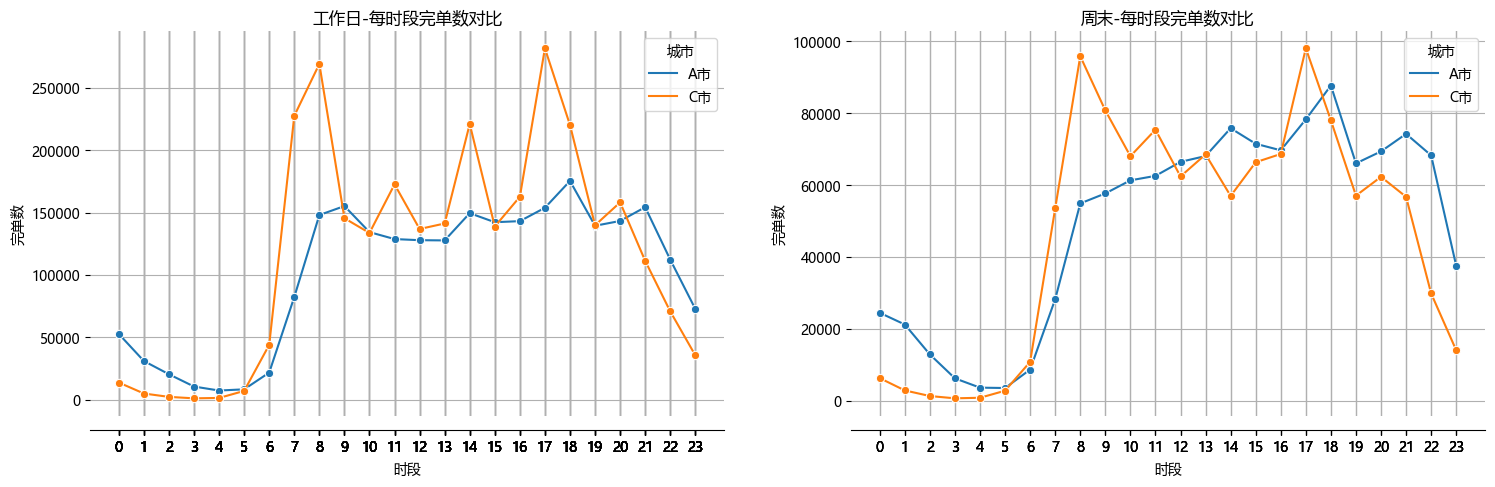

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', **{'family': 'Microsoft YaHei, SimHei'})  # 设置中文字体的支持

fig = plt.figure(figsize=(18, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

sns.lineplot(data=workday.groupby(['城市', '时段'])['完单数'].sum().reset_index(), \
             x='时段', y='完单数', marker='o', hue='城市', ax=ax1)

ax1.set_xticks(workday['时段'])
ax1.set_title('工作日-每时段完单数对比')
ax1.grid(True)

sns.lineplot(data=weekend.groupby(['城市', '时段'])['完单数'].sum().reset_index(), \
             x='时段', y='完单数', marker='o', hue='城市', ax=ax2)
ax2.set_xticks(weekend['时段'])
ax2.set_title('周末-每时段完单数对比')
ax2.grid(True)

sns.despine(left=True, offset=10)  

## 供给端

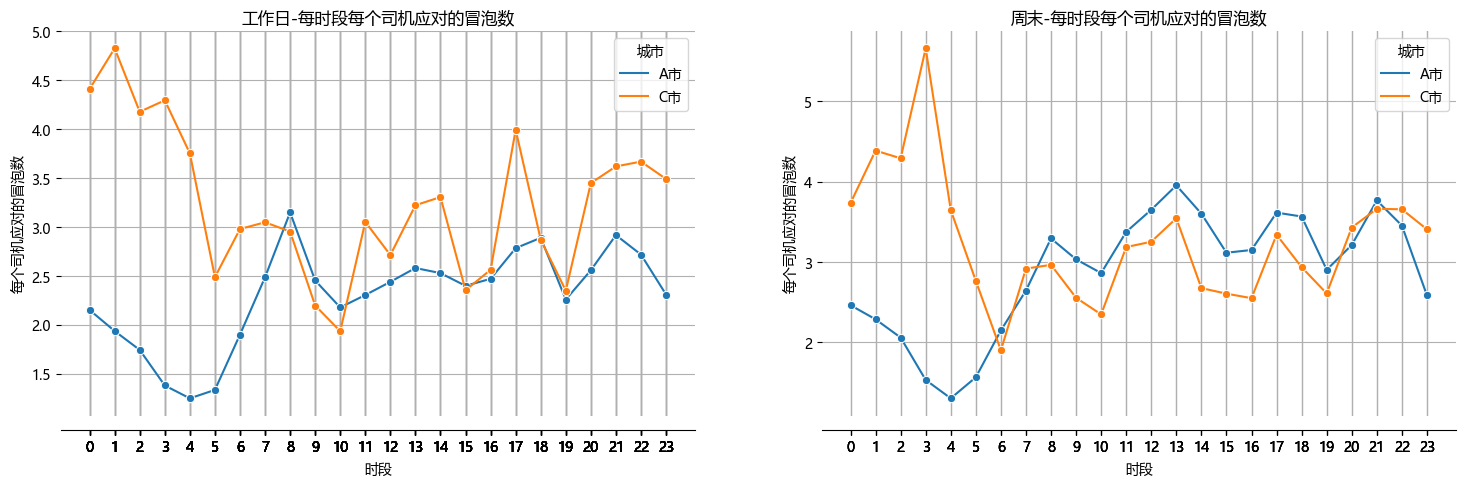

In [16]:
workday = workday.eval('每个司机应对的冒泡数 = 冒泡数/司机在线')
weekend = weekend.eval('每个司机应对的冒泡数 = 冒泡数/司机在线')

fig = plt.figure(figsize=(18, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

sns.lineplot(data=workday.groupby(['城市', '时段'])['每个司机应对的冒泡数'].mean().reset_index(), \
             x='时段', marker='o', y='每个司机应对的冒泡数', hue='城市', ax=ax1)

ax1.set_xticks(workday['时段'])
ax1.set_xticks(workday['时段'])
ax1.set_title('工作日-每时段每个司机应对的冒泡数')
ax1.grid(True)

sns.lineplot(data=weekend.groupby(['城市', '时段'])['每个司机应对的冒泡数'].mean().reset_index(), \
             x='时段', marker='o', y='每个司机应对的冒泡数', hue='城市', ax=ax2)
ax2.set_xticks(weekend['时段'])
ax2.set_xticks(weekend['时段'])
ax2.set_title('周末-每时段每个司机应对的冒泡数')
ax2.grid(True)

sns.despine(left=True, offset=10)

## C市周二发生了什么？

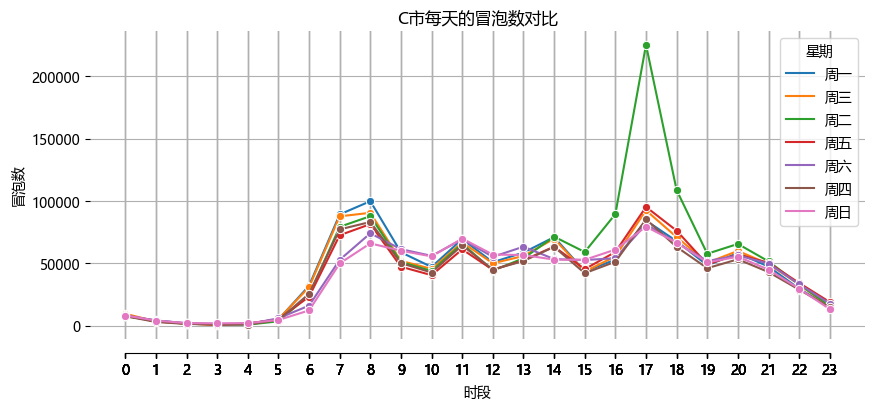

In [17]:
# 需求端：顾客冒泡数
c_city = df.query('城市 == "C市"')
plt.figure(figsize=(10, 4))
sns.lineplot(data=c_city.groupby(['星期', '时段'])['冒泡数'].sum().reset_index(), \
             x='时段', y='冒泡数', marker='o', hue='星期')

plt.xticks(c_city['时段'])
plt.title('C市每天的冒泡数对比')
plt.grid(True)
sns.despine(left=True, trim=True, offset=10)

In [18]:
# 供给端
c_tuesday = df.query('星期 == "周二"').query('城市 == "C市"')
c_tuesday['呼叫率'] = round(c_tuesday['呼叫数']/c_tuesday['冒泡数'], 2)
c_tuesday['应答率'] = round(c_tuesday['应答数']/c_tuesday['呼叫数'], 2)
c_tuesday['完单率'] = round(c_tuesday['完单数']/c_tuesday['应答数'], 2)
c_tuesday['最终转化率'] = round(c_tuesday['完单数']/c_tuesday['冒泡数'], 2)
c_tuesday.head()

星期  时段  城市   冒泡数   呼叫数   应答数   完单数  司机在线   呼叫率   应答率   完单率  最终转化率  每人次订单量
360  周二   0  C市  7720  3620  2700  2400  1700  0.47  0.75  0.89   0.31    1.41
361  周二   1  C市  4200  1980   920   860   680  0.47  0.46  0.93   0.20    1.26
362  周二   2  C市  1720   680   460   400   460  0.40  0.68  0.87   0.23    0.87
363  周二   3  C市  1180   540   180   160   220  0.46  0.33  0.89   0.14    0.73
364  周二   4  C市  1040   360   220   140   440  0.35  0.61  0.64   0.13    0.32

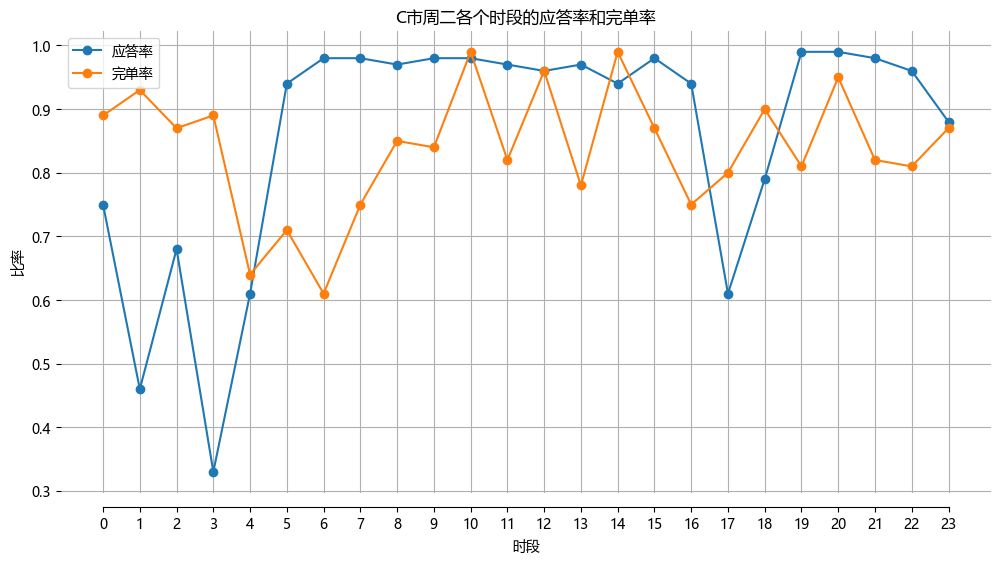

In [20]:
plt.figure(figsize=(12, 6))
# plt.plot(c_tuesday['时段'], c_tuesday['呼叫率'], label='呼叫率')
plt.plot(c_tuesday['时段'], c_tuesday['应答率'], label='应答率', marker='o')
plt.plot(c_tuesday['时段'], c_tuesday['完单率'], label='完单率', marker='o')

plt.legend()  # 设置图例
plt.xticks(c_tuesday['时段'])  # 设置横轴刻度
plt.xlabel('时段')
plt.ylabel('比率')
plt.title('C市周二各个时段的应答率和完单率')
plt.grid(True)
sns.despine(trim=True, left=True, offset=10)

In [55]:
# 周二16~19时的应答率和完单率
c_tuesday_rush_hour = c_tuesday[c_tuesday['时段'].isin([16, 17, 18, 19])][['星期', '时段', '应答率', '完单率']]

# 非周二
c_city['应答率'] = round(c_city['应答数']/c_city['呼叫数'], 2)
c_city['完单率'] = round(c_city['完单数']/c_city['应答数'], 2)
c_except_tuesday_rush_hour = c_city[~c_city['星期'].isin(['周二'])]
result = c_except_tuesday_rush_hour.groupby(['时段'])[['应答率', '完单率']].agg('mean').reset_index()
result[['应答率', '完单率']] = round(result[['应答率', '完单率']], 2)
result['星期'] = ['非周二']*24
result = result[result['时段'].isin([16, 17, 18, 19])][['星期', '时段', '应答率', '完单率']]

# 拼接表格
pd.merge(c_tuesday_rush_hour, result, on='时段', suffixes=['(周二)', '(非周二)'])

C:\Users\Rocloo\AppData\Local\Temp\ipykernel_36532\4114750197.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_city['应答率'] = round(c_city['应答数']/c_city['呼叫数'], 2)
C:\Users\Rocloo\AppData\Local\Temp\ipykernel_36532\4114750197.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_city['完单率'] = round(c_city['完单数']/c_city['应答数'], 2)


星期(周二)  时段  应答率(周二)  完单率(周二) 星期(非周二)  应答率(非周二)  完单率(非周二)
0     周二  16     0.94     0.75     非周二      0.98      0.87
1     周二  17     0.61     0.80     非周二      0.97      0.87
2     周二  18     0.79     0.90     非周二      0.98      0.85
3     周二  19     0.99     0.81     非周二      0.99      0.82

In [53]:
pd.merge(c_tuesday_rush_hour, result, on='时段', suffixes=['(周二)', '(非周二)']).to_clipboard()